In [1]:
import numpy as np
import matplotlib.pyplot as plt
from symmetry_lens.utils import *

2024-10-12 16:34:41.526767: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-12 16:34:41.556942: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 16:34:41.556967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 16:34:41.556991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 16:34:41.563081: I tensorflow/core/platform/cpu_feature_g

In [2]:
MODEL_WEIGHTS_PATH = "model_weights/ep10.h5"
DATASET_SIZE_IN_BATCHES = 100
BATCH_SIZE = 16500
OUTPUT_REPRESENTATION = "dst"
SYNTHETIC_DATASET_FEATURES = [
    {
        "type": "gaussian",
        "scale_min": 0.5,
        "scale_max": 2.5,
        "amplitude_min": 0.5,
        "amplitude_max": 1.5
    }
]
NOISE_STD = 0.05
WAVEFORM_TIMESTEPS=33

In [3]:
# Creating a dataset. 
dataset = make_dataset(
    output_representation= OUTPUT_REPRESENTATION,
    batch_size = BATCH_SIZE,
    num_batches = DATASET_SIZE_IN_BATCHES,
    features = SYNTHETIC_DATASET_FEATURES,
    noise_normalized_std = NOISE_STD,
    waveform_timesteps = WAVEFORM_TIMESTEPS
)

In [4]:
# Create model and load weights.
x_init = np.random.normal(size=(BATCH_SIZE, WAVEFORM_TIMESTEPS, 1))
model = create_model()
model.compile()
model(x_init)
model.load_weights(MODEL_WEIGHTS_PATH)

2024-10-12 16:34:58.738335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2024-10-12 16:34:58.739349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22286 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-10-12 16:34:58.740292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22286 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6
2024-10-12 16:34:58.741219: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22212 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

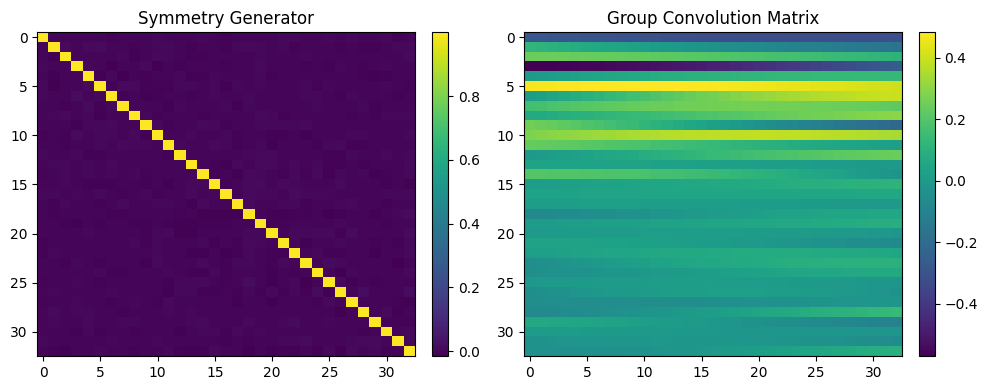

In [5]:
# Plot learned symmetry generator and group correlation map. 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

im1 = ax[0].imshow(model.symmetry_generator, aspect="auto", cmap="viridis")
ax[0].set_title("Symmetry Generator")  # Add title to the first subplot

im2 = ax[1].imshow(model.group_convolution_matrix, aspect="auto", cmap="viridis")
ax[1].set_title("Group Convolution Matrix")  # Add title to the second subplot

fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)

# Adjust layout for better spacing
plt.tight_layout()

In [6]:
# Downsample the dataset and have the output.
downsample_factor = 100
x = dataset[::downsample_factor]
print("Downsampled dataset shape:", x.shape)  # Expected: (16500, 33, 1)
y = model(x)
y = y.numpy()

Downsampled dataset shape: (16500, 33, 1)


In [7]:
# Randomly select some samples.
random_seed = 42
np.random.seed(random_seed)
total_samples = x.shape[0]
num_pairs = 9
selected_indices = np.random.choice(total_samples, size=num_pairs, replace=False)
print("Selected indices:", selected_indices)

Selected indices: [ 3207  5890  8813 12295 12355 15145  6302    47 16032]


In [8]:
# Plot pairs of inputs and outputs.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust figsize as needed
axes = axes.flatten()

for i, idx in enumerate(selected_indices):
    ax = axes[i]
    
    input_signal = x[idx].squeeze()   # Shape: (33,)
    output_signal = y[idx].squeeze()              # Shape: (33,)
    
    timesteps = np.arange(33)
    
    ax.plot(timesteps, input_signal, color='red', label='Input')
    ax.plot(timesteps, output_signal, color='blue', label='Output')
    
    ax.set_title(f'Pair {i+1} (Index: {idx})')
    ax.set_xlabel('Timestep')
    ax.set_ylabel('Signal Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()

# Show the Figure
plt.show()
plt.clf() 

<Figure size 1500x1500 with 0 Axes>